In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
df_train=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
df_test=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")


In [4]:
df_train.head(7)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True


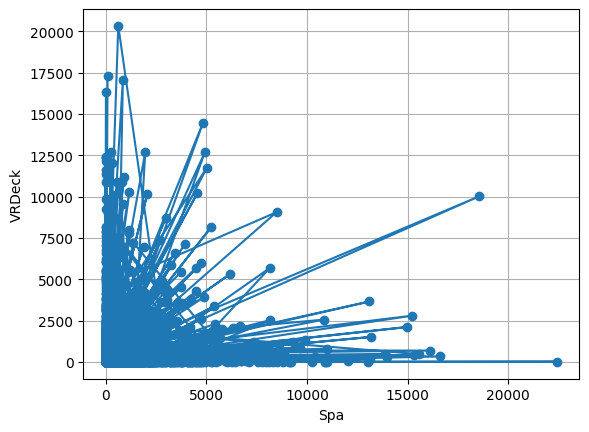

In [5]:
column1="Spa"
column2="VRDeck"
plt.figure()
plt.plot(df_train[column1],df_train[column2],marker='o',linestyle='-')
plt.xlabel(column1)
plt.ylabel(column2)
plt.grid(True)
plt.show()

In [8]:
df_train["HomePlanet"].isnull().sum()
df_test["HomePlanet"].isnull().sum()

0

In [9]:
df_train["HomePlanet"]=df_train["HomePlanet"].fillna("Earth")
df_test["HomePlanet"]=df_test["HomePlanet"].fillna("Earth")

In [10]:
df_train["HomePlanet"].value_counts()

HomePlanet
Earth     4803
Europa    2131
Mars      1759
Name: count, dtype: int64

In [11]:
one_hot_encoded=pd.get_dummies(df_train["HomePlanet"])
df_train=pd.concat([df_train,one_hot_encoded],axis=1)
df_train.drop("HomePlanet",axis=1,inplace=True)
one_hot_encoded=pd.get_dummies(df_test["HomePlanet"])
df_test=pd.concat([df_test,one_hot_encoded],axis=1)
df_test.drop("HomePlanet",axis=1,inplace=True)

In [12]:
df_train.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,False,True,False
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,False,False
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,False,True,False
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,False,True,False
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,False,False


In [13]:
mapping={
    True:1,
    False:0
}
df_train["Earth"]=df_train["Earth"].map(mapping)
df_train["Europa"]=df_train["Europa"].map(mapping)
df_train["Mars"]=df_train["Mars"].map(mapping)
df_test["Earth"]=df_test["Earth"].map(mapping)
df_test["Europa"]=df_test["Europa"].map(mapping)
df_test["Mars"]=df_test["Mars"].map(mapping)
df_train.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0


In [14]:
df_train.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0


In [16]:
print(df_train['CryoSleep'].isnull().sum())
df_train["CryoSleep"]=df_train["CryoSleep"].fillna(True)
df_test["CryoSleep"]=df_test["CryoSleep"].fillna(True)
print(df_train['CryoSleep'].value_counts())

0
CryoSleep
False    5439
True     3254
Name: count, dtype: int64


In [17]:
df_test.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Earth,Europa,Mars
0,0013_01,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,1,0,0
1,0018_01,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,1,0,0
2,0019_01,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,1,0
3,0021_01,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,1,0
4,0023_01,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,1,0,0


In [18]:
mapping={
    True:1,
    False:0
}
df_train["Transported"].map(mapping)
df_train.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0


In [19]:
df_train["CryoSleep"]=df_train["CryoSleep"].map(mapping)
df_test["CryoSleep"]=df_test["CryoSleep"].map(mapping)

In [20]:
df_train.head()
df_train['Cabin'].value_counts()

Cabin
G/734/S     8
B/11/S      7
F/1411/P    7
B/82/S      7
G/981/S     7
           ..
G/543/S     1
B/106/P     1
G/542/S     1
F/700/P     1
G/559/P     1
Name: count, Length: 6560, dtype: int64

In [21]:
df_train[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = df_train['Cabin'].str.split('/', expand=True)

In [22]:
print(df_train['Cabin_deck'].value_counts())
print(df_train['Cabin_num'].value_counts())
print(df_train['Cabin_side'].value_counts())

Cabin_deck
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64
Cabin_num
82      28
86      22
19      22
176     21
97      21
        ..
1864     1
1865     1
1761     1
1866     1
1867     1
Name: count, Length: 1817, dtype: int64
Cabin_side
S    4288
P    4206
Name: count, dtype: int64


In [23]:
print(df_train['Cabin_deck'].isnull().sum())
print(df_train['Cabin_num'].isnull().sum())
print(df_train['Cabin_side'].isnull().sum())
df_train.drop('Cabin',axis=1,inplace=True)
df_train.head()

199
199
199


,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,B,0,P
1,0002_01,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,F,0,S
2,0003_01,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,A,0,S
3,0003_02,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,A,0,S
4,0004_01,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,F,1,S


In [24]:
df_test[['Cabin_deck', 'Cabin_num', 'Cabin_side']] = df_test['Cabin'].str.split('/', expand=True)

In [25]:
df_test.drop('Cabin',axis=1,inplace=True)

In [26]:
print(df_test['Cabin_side'].value_counts())

Cabin_side
S    2093
P    2084
Name: count, dtype: int64


In [27]:
df_train['Cabin_num'] = pd.to_numeric(df_train['Cabin_num'], errors='coerce')
df_test['Cabin_num']=pd.to_numeric(df_test['Cabin_num'], errors='coerce')
df_train.head()

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,B,0.0,P
1,0002_01,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,F,0.0,S
2,0003_01,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,A,0.0,S
3,0003_02,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,A,0.0,S
4,0004_01,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,F,1.0,S


In [28]:
df_train['Cabin_num']=df_train['Cabin_num'].fillna(df_train['Cabin_num'].median())
df_test['Cabin_num']=df_test['Cabin_num'].fillna(df_test['Cabin_num'].median())
df_train['Cabin_side']=df_train['Cabin_side'].fillna('S')
df_test['Cabin_side']=df_test['Cabin_side'].fillna('S')

In [29]:
df_train.head(20)

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,B,0.0,P
1,0002_01,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,F,0.0,S
2,0003_01,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,A,0.0,S
3,0003_02,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,A,0.0,S
4,0004_01,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,F,1.0,S
5,0005_01,0,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,1,0,0,F,0.0,P
6,0006_01,0,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,1,0,0,F,2.0,S
7,0006_02,1,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,1,0,0,G,0.0,S
8,0007_01,0,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,1,0,0,F,3.0,S
9,0008_01,1,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0,1,0,B,1.0,P


In [30]:
mapping={
    'S':1,
    'P':0
}
df_train['Cabin_side']=df_train['Cabin_side'].map(mapping)
df_test['Cabin_side']=df_test['Cabin_side'].map(mapping)
df_train.head()

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,B,0.0,0
1,0002_01,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,F,0.0,1
2,0003_01,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,A,0.0,1
3,0003_02,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,A,0.0,1
4,0004_01,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,F,1.0,1


In [31]:
mapping={
    True:1,
    False:0
}
df_train['Transported']=df_train['Transported'].map(mapping)
df_train.head()

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Earth,Europa,Mars,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,1,0,B,0.0,0
1,0002_01,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,0,0,F,0.0,1
2,0003_01,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0,1,0,A,0.0,1
3,0003_02,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0,1,0,A,0.0,1
4,0004_01,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1,0,0,F,1.0,1


In [32]:
df_train.drop('Name',axis=1,inplace=True)
df_test.drop('Name',axis=1,inplace=True)


In [33]:
print(df_train['VIP'].value_counts())
print(df_test['VIP'].value_counts())

VIP
False    8291
True      199
Name: count, dtype: int64
VIP
False    4110
True       74
Name: count, dtype: int64


In [34]:
mapping={
    True:1,
    False:0
}
df_train['VIP']=df_train['VIP'].map(mapping)
df_test['VIP']=df_test['VIP'].map(mapping)
df_train.head()

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,B,0.0,0
1,0002_01,0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,F,0.0,1
2,0003_01,0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,A,0.0,1
3,0003_02,0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,A,0.0,1
4,0004_01,0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,F,1.0,1


In [35]:
df_train['VIP']=df_train['VIP'].fillna(0)
df_test['VIP']=df_test['VIP'].fillna(0)
print(df_train['VIP'].isnull().sum())

0


In [36]:
df_train['Destination'].value_counts()
df_train['Destination']=df_train['Destination'].fillna('TRAPPIST-1e')
df_train['Destination'].isnull().sum()

0

In [37]:
df_test['Destination'].value_counts()
df_test['Destination']=df_test['Destination'].fillna('TRAPPIST-1e')
df_test['Destination'].isnull().sum()

0

In [38]:
df_train.head()

,PassengerId,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,Cabin_deck,Cabin_num,Cabin_side
0,0001_01,0,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,B,0.0,0
1,0002_01,0,TRAPPIST-1e,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,F,0.0,1
2,0003_01,0,TRAPPIST-1e,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,A,0.0,1
3,0003_02,0,TRAPPIST-1e,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,A,0.0,1
4,0004_01,0,TRAPPIST-1e,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,F,1.0,1


In [39]:
one_hot_encoded=pd.get_dummies(df_train['Destination'])
df_train=pd.concat([df_train,one_hot_encoded], axis=1)
df_train.drop('Destination',axis=1,inplace=True)
one_hot_encoded=pd.get_dummies(df_test['Destination'])
df_test=pd.concat([df_test,one_hot_encoded], axis=1)
df_test.drop('Destination',axis=1,inplace=True)
df_train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,Cabin_deck,Cabin_num,Cabin_side,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,B,0.0,0,False,False,True
1,0002_01,0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,F,0.0,1,False,False,True
2,0003_01,0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,A,0.0,1,False,False,True
3,0003_02,0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,A,0.0,1,False,False,True
4,0004_01,0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,F,1.0,1,False,False,True


In [40]:
df_train['TRAPPIST-1e']=df_train['TRAPPIST-1e'].map(mapping)
df_test['TRAPPIST-1e']=df_test['TRAPPIST-1e'].map(mapping)
df_train['PSO J318.5-22']=df_train['PSO J318.5-22'].map(mapping)
df_test['PSO J318.5-22']=df_test['PSO J318.5-22'].map(mapping)
df_train['55 Cancri e']=df_train['55 Cancri e'].map(mapping)
df_test['55 Cancri e']=df_test['55 Cancri e'].map(mapping)
df_train.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Earth,Europa,Mars,Cabin_deck,Cabin_num,Cabin_side,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,B,0.0,0,0,0,1
1,0002_01,0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,1,0,0,F,0.0,1,0,0,1
2,0003_01,0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,A,0.0,1,0,0,1
3,0003_02,0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,A,0.0,1,0,0,1
4,0004_01,0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,1,0,0,F,1.0,1,0,0,1


In [41]:
df_train['Cabin_deck']

0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: Cabin_deck, Length: 8693, dtype: object

In [42]:
one_hot_encoded=pd.get_dummies(df_train['Cabin_deck'])
df_train=pd.concat([df_train,one_hot_encoded], axis=1)
df_train.drop('Cabin_deck',axis=1,inplace=True)
one_hot_encoded=pd.get_dummies(df_test['Cabin_deck'])
df_test=pd.concat([df_test,one_hot_encoded], axis=1)
df_test.drop('Cabin_deck',axis=1,inplace=True)
df_train.head(10)

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,PSO J318.5-22,TRAPPIST-1e,A,B,C,D,E,F,G,T
0,0001_01,0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,1,False,True,False,False,False,False,False,False
1,0002_01,0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,...,0,1,False,False,False,False,False,True,False,False
2,0003_01,0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,...,0,1,True,False,False,False,False,False,False,False
3,0003_02,0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,...,0,1,True,False,False,False,False,False,False,False
4,0004_01,0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,...,0,1,False,False,False,False,False,True,False,False
5,0005_01,0,44.0,0.0,0.0,483.0,0.0,291.0,0.0,1,...,1,0,False,False,False,False,False,True,False,False
6,0006_01,0,26.0,0.0,42.0,1539.0,3.0,0.0,0.0,1,...,0,1,False,False,False,False,False,True,False,False
7,0006_02,1,28.0,0.0,0.0,0.0,0.0,0.0,NaN,1,...,0,1,False,False,False,False,False,False,True,False
8,0007_01,0,35.0,0.0,0.0,785.0,17.0,216.0,0.0,1,...,0,1,False,False,False,False,False,True,False,False
9,0008_01,1,14.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,False,True,False,False,False,False,False,False


In [43]:
s=['A','B','C','D','E','F','G','T']
for i in s:
    df_train[i]=df_train[i].map(mapping)

In [44]:
for i in s:
    df_test[i]=df_test[i].map(mapping)

In [45]:
df_test.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Earth,...,PSO J318.5-22,TRAPPIST-1e,A,B,C,D,E,F,G,T
0,0013_01,1,27.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,1,0
1,0018_01,0,19.0,0.0,0.0,9.0,0.0,2823.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0
2,0019_01,1,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
3,0021_01,0,38.0,0.0,0.0,6652.0,0.0,181.0,585.0,0,...,0,1,0,0,1,0,0,0,0,0
4,0023_01,0,20.0,0.0,10.0,0.0,635.0,0.0,0.0,1,...,0,1,0,0,0,0,0,1,0,0


In [46]:
for column in df_train.columns:
    if(df_train[column].isnull().sum()>0):
        df_train[column]=df_train[column].fillna(df_train[column].median())
        df_test[column]=df_test[column].fillna(df_test[column].median())

In [47]:
df_train.isnull().sum()

PassengerId      0
CryoSleep        0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Transported      0
Earth            0
Europa           0
Mars             0
Cabin_num        0
Cabin_side       0
55 Cancri e      0
PSO J318.5-22    0
TRAPPIST-1e      0
A                0
B                0
C                0
D                0
E                0
F                0
G                0
T                0
dtype: int64

In [48]:
X=df_train.drop(['Transported','PassengerId'],axis=1)
Y=df_train['Transported']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7705577918343876


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from keras.models import Sequential
from keras.layers import Dense
NeuralModel=keras.Sequential([
    Dense(32,activation='softmax',input_shape=(X.shape[1],)),
    Dense(10,activation='tanh'),
    Dense(10,activation='relu'),
    Dense(1,activation='sigmoid')
])
NeuralModel.compile(optimizer='adam',loss='binary_crossentropy', metrics='accuracy')
NeuralModel.fit(X_train,Y_train,epochs=100,batch_size=128,validation_data=(X_test,Y_test))

Epoch 1/100


I0000 00:00:1707246286.103832     196 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


55/55 [==============================] - 4s 8ms/step - loss: 0.6839 - accuracy: 0.5296 - val_loss: 0.6504 - val_accuracy: 0.7085
Epoch 2/100
55/55 [==============================] - 0s 4ms/step - loss: 0.6353 - accuracy: 0.6983 - val_loss: 0.6147 - val_accuracy: 0.7171
Epoch 3/100
55/55 [==============================] - 0s 4ms/step - loss: 0.5942 - accuracy: 0.7207 - val_loss: 0.5862 - val_accuracy: 0.7165
Epoch 4/100
55/55 [==============================] - 0s 4ms/step - loss: 0.5466 - accuracy: 0.7400 - val_loss: 0.5343 - val_accuracy: 0.7395
Epoch 5/100
55/55 [==============================] - 0s 4ms/step - loss: 0.5171 - accuracy: 0.7594 - val_loss: 0.5120 - val_accuracy: 0.7694
Epoch 6/100
55/55 [==============================] - 0s 4ms/step - loss: 0.5023 - accuracy: 0.7807 - val_loss: 0.5148 - val_accuracy: 0.7637
Epoch 7/100
55/55 [==============================] - 0s 5ms/step - loss: 0.4953 - accuracy: 0.7850 - val_loss: 0.5199 - val_accuracy: 0.7608
Epoch 8/100
55/55 [======

In [50]:
Y_pred=NeuralModel.predict(X_test)
Y_pred=np.round(Y_pred)
accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy:", accuracy)

55/55 [==============================] - 0s 2ms/step
Accuracy: 0.7763082231167338


In [51]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print("Accuracy=",accuracy)
feature_importance = clf.feature_importances_
print("Feature Importance:", feature_importance)

Accuracy= 0.8010350776308223
Feature Importance: [8.23251478e-02 1.34266237e-01 2.46988492e-03 9.47906730e-02
 8.30845405e-02 7.76024857e-02 1.03261873e-01 9.43411585e-02
 2.25176351e-02 1.30105807e-02 9.09285719e-03 1.81037437e-01
 2.26660870e-02 8.51435973e-03 5.76402392e-03 9.53014383e-03
 2.05643060e-03 5.29178489e-03 6.72160062e-03 3.27594421e-03
 1.24750479e-02 1.32869884e-02 1.25292710e-02 8.78076409e-05]


In [52]:
X_submission=df_test.drop('PassengerId',axis=1)
Y_submission=clf.predict(X_submission)
print(Y_submission)
Y_submission=pd.DataFrame(Y_submission,columns=['Transported'])
Submission=pd.concat([df_test['PassengerId'],Y_submission],axis=1)
Submission.head(7)

[1 0 1 ... 1 1 0]


,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1
5,0027_01,1
6,0029_01,1


In [53]:
demapping={
    1:True,
    0:False
}
Submission['Transported']=Submission['Transported'].map(demapping)
Submission.head(7)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,True
6,0029_01,True


In [54]:
import os
output_directory = '/kaggle/working/'
filename = 'Random_Forest_Submission.csv'
file_path = os.path.join(output_directory, filename)
Submission.to_csv(file_path, index=False)